# Task 5: To explore Business Analytics
* By Naveen Kamal P V

* Perform ‘Exploratory Data Analysis’ on the provided dataset SampleSuperstore
* Problem statement: You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data?


### Importing any initial recommended libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Reading dataset into dataframe for Analysis

In [33]:
sample_ss = pd.read_csv("SampleSuperstore.csv")
sample_ss.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [34]:
sample_ss.shape

(9994, 13)

### Check for missing data (e.g. NaN)

In [35]:
sample_ss.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Check for duplicates and drop them

In [36]:
sample_ss.duplicated().sum()

17

In [37]:
sample_ss.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [38]:
sample_ss.shape

(9994, 13)

In [39]:
sample_ss.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Exploring dataset information

In [40]:
sample_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [41]:
sample_ss.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Removing irrelevant variables
### Postal code is not needed for exploratory needs

In [42]:
super_store = sample_ss.drop(['Postal Code'], axis=1)
super_store = super_store.drop(['Country'], axis=1)

In [43]:
super_store


,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Descriptive Statistics

In [44]:
super_store.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


### Analysing the correlations among variables

In [45]:
corrl = super_store.corr()
corrl

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


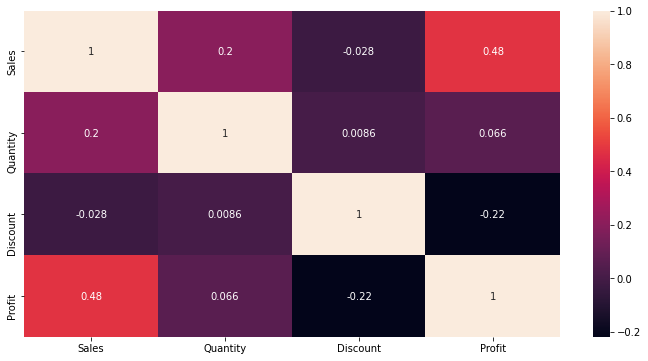

In [46]:
plt.figure(figsize=(12,6))
sns.heatmap(corrl, annot = True)
plt.show()


# Data Visualization
Exploring the distribution of the 'sub-category' pertaining to 'category'

In [47]:
super_store['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

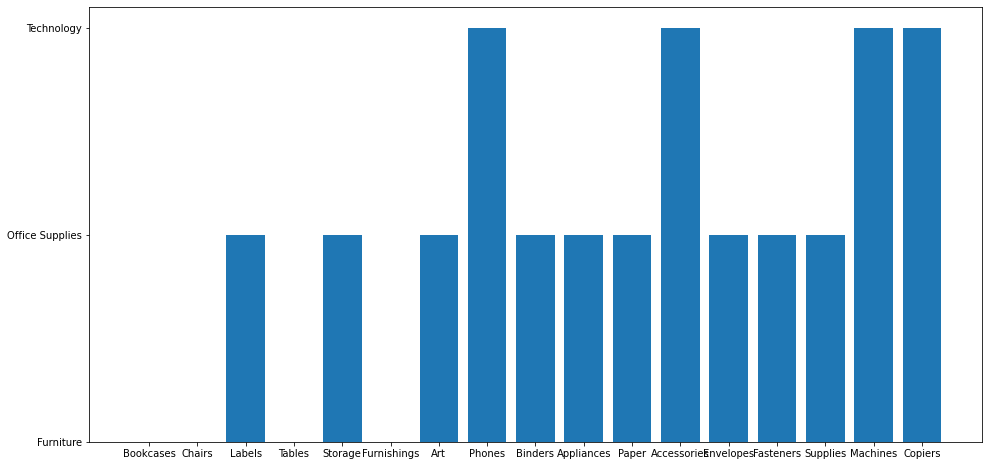

In [48]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category', 'Category', data=super_store)
plt.show()

# More Visuals of individual labels

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64


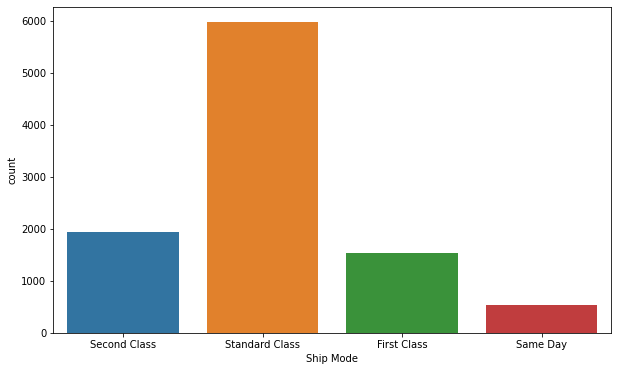

In [49]:
print (super_store['Ship Mode'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x=super_store['Ship Mode'])
plt.show()


Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64


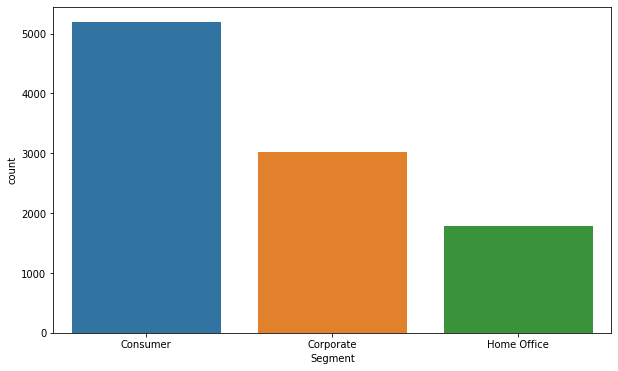

In [50]:
print (super_store['Segment'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x=super_store['Segment'])
plt.show()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Iowa City          1
Orland Park        1
Layton             1
Champaign          1
Waterloo           1
Name: City, Length: 531, dtype: int64


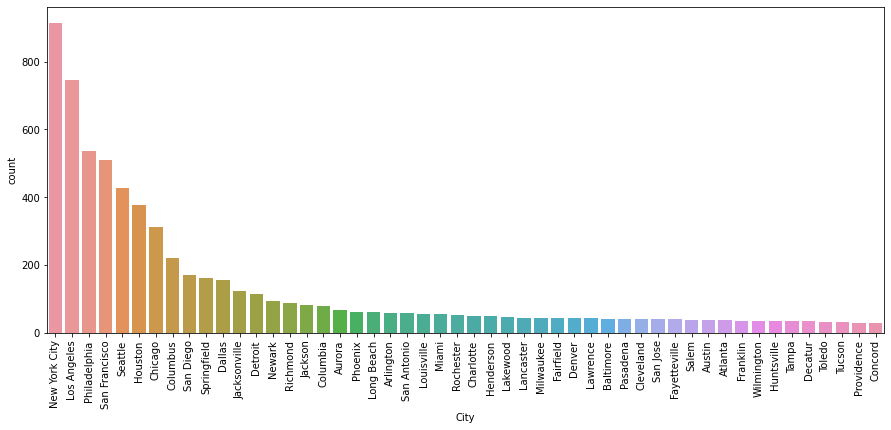

In [51]:
print (super_store['City'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(x=super_store['City'], order=(super_store['City'].value_counts().head(50)).index)
plt.xticks(rotation=90)
plt.show()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

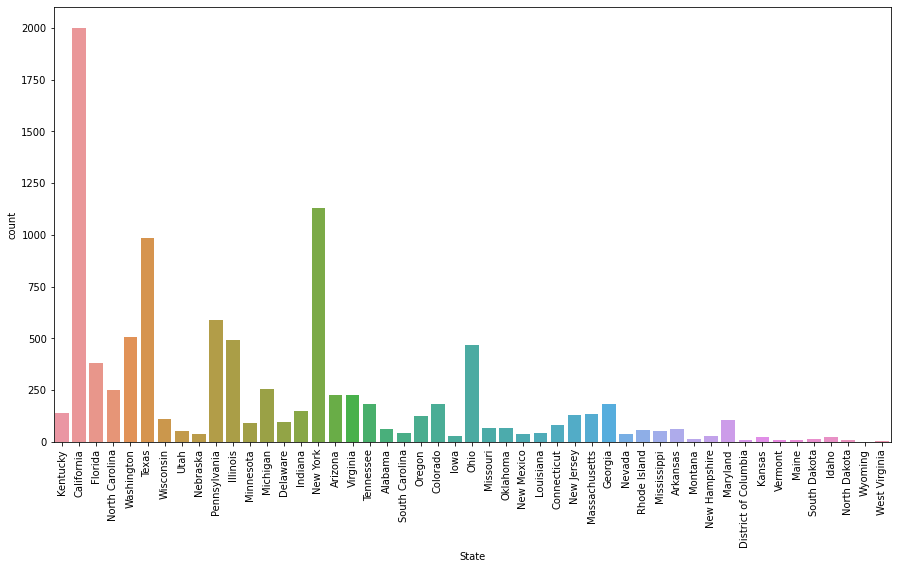

In [52]:
print (super_store['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=super_store['State'])
plt.xticks(rotation=90)
plt.show()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64


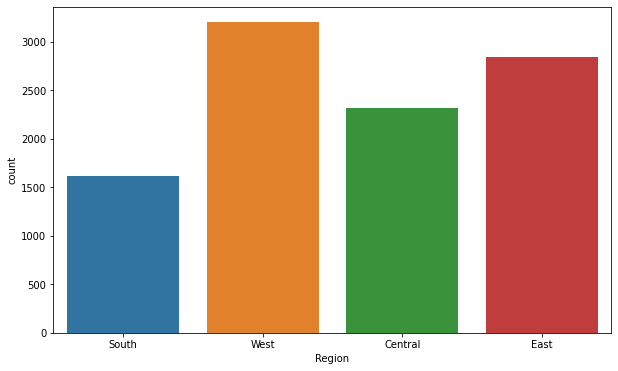

In [53]:
print (super_store['Region'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x=super_store['Region'])
plt.show()


Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


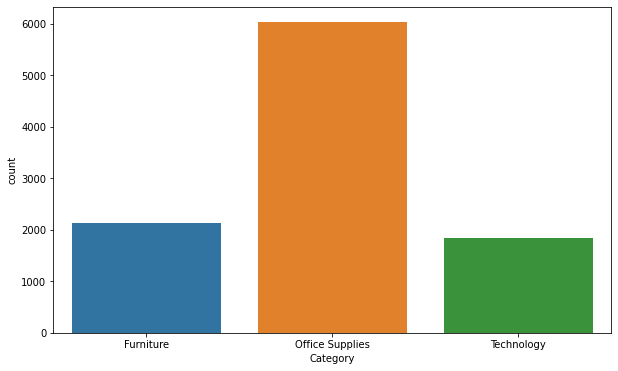

In [54]:
print (super_store['Category'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x=super_store['Category'])
plt.show()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


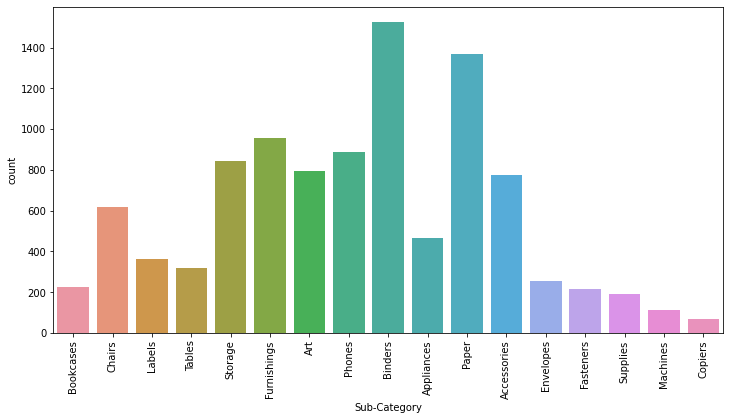

In [55]:
print (super_store['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=super_store['Sub-Category'])
plt.xticks(rotation=90)
plt.show()


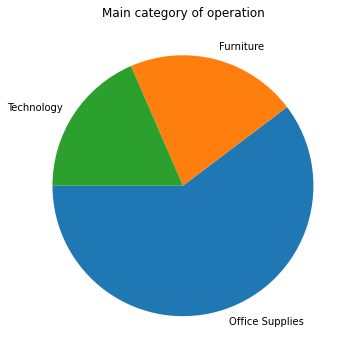

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


In [56]:
plt.figure(figsize=(12,6))
plt.pie(super_store['Category'].value_counts(), labels=super_store['Category'].value_counts().index, startangle=180, radius=1)
plt.title('Main category of operation')
plt.show()
print (super_store['Category'].value_counts())

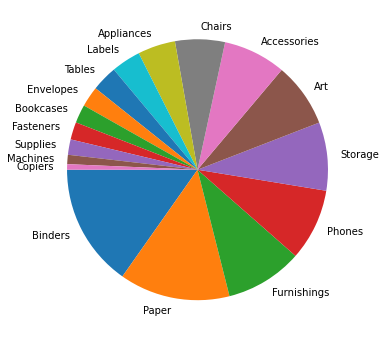

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


In [57]:
plt.figure(figsize=(12,6))
plt.pie(super_store['Sub-Category'].value_counts(), labels=super_store['Sub-Category'].value_counts().index, startangle=180, radius=1)
plt.show()
print (super_store['Sub-Category'].value_counts())


# Analysis of Subcategory wrt Profits

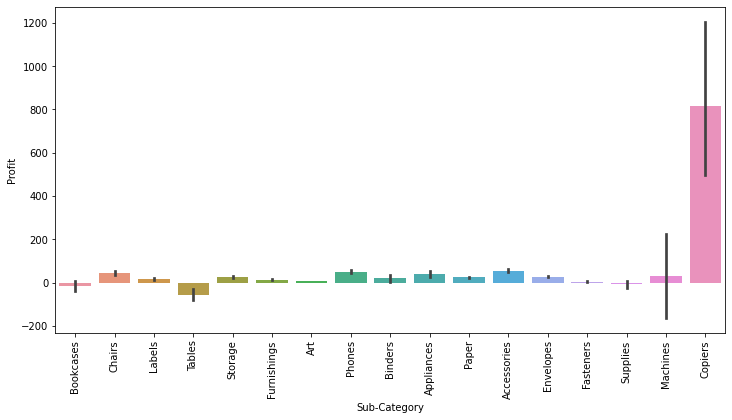

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(x=super_store['Sub-Category'], y=super_store['Profit'])
plt.xticks(rotation=90)
plt.show()

# Exploratory Analysis from visualizations given above
The following insights should be looked into for a more profitable operation:
Furniture and Technology sales need to be improved
All sub-categories but Copiers are weak in profit making and should be improved
Tables sales operations should be reduced drastically or stopped; being the only sub-category with no profit but loss
Number of people working as Copiers should be increased for more products and sales and hence profit
Supplies to the south region should be improved upon